In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# loading the dataset

In [8]:
data=pd.read_excel(r"C:\Users\manju\Desktop\ICTAK DSA\DATA SETS\excel\iris.xls")
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
#to display stats about data
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
#basic info about datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
#to display no of species for each class
data.Classification.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

# Preprocessing the dataset

In [12]:
#check for null values
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [13]:
data1=data

In [14]:
data1.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
#filling missing values in numerical column with mean()
data1.SL=data1.SL.fillna(data1.SL.mean())

In [16]:
data1.SW=data1.SW.fillna(data1.SW.mean())

In [17]:
data1.PL=data1.PL.fillna(data1.PL.mean())

In [18]:
data1.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [19]:
data1.Classification.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Exploratory data analysis

<AxesSubplot:>

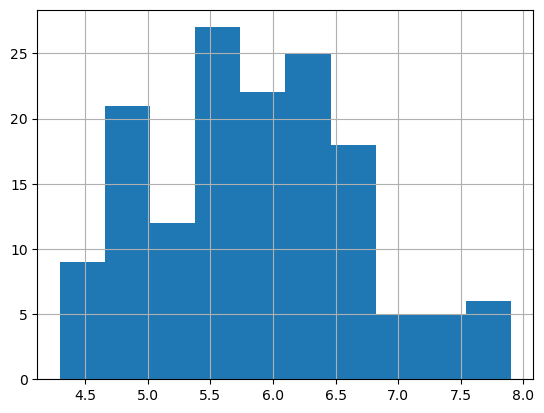

In [20]:
data1.SL.hist()

<AxesSubplot:>

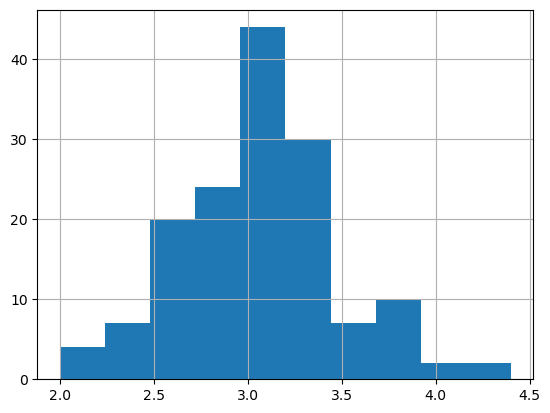

In [21]:
data1.SW.hist()

<AxesSubplot:>

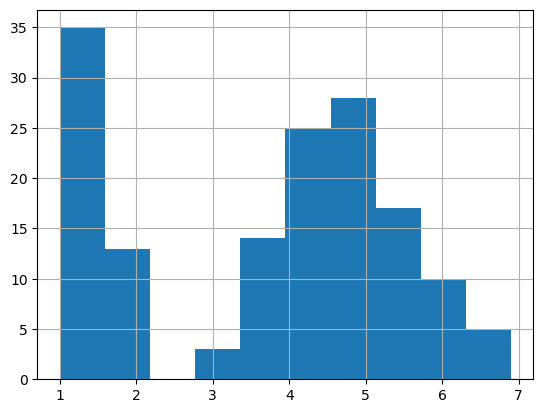

In [22]:
data1.PL.hist()

<AxesSubplot:>

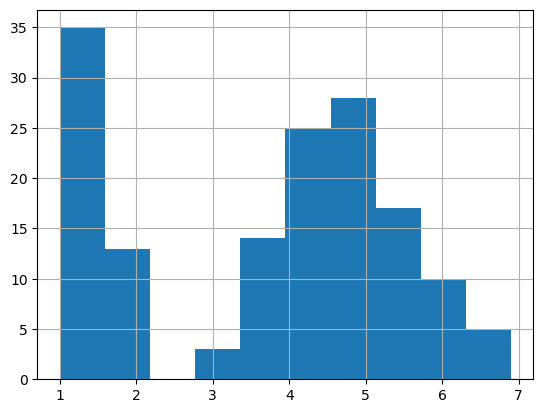

In [23]:
data1.PL.hist()

In [24]:
#scatterplot
colors=['red','orange','blue']
Classification=['Iris-setosa','Iris-versicolor','Iris-virginica']

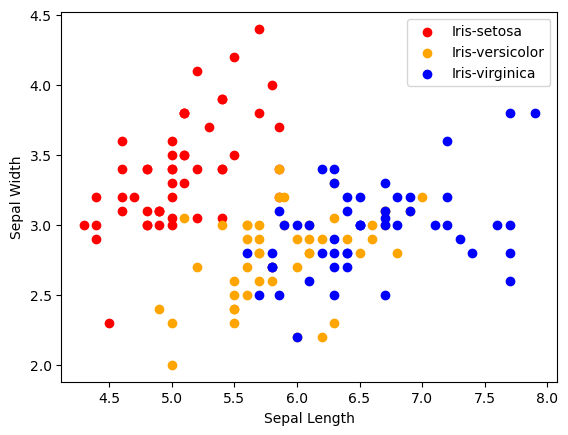

In [25]:
for i in range(3):
    x=data1[data1['Classification']==Classification[i]]
    plt.scatter(x['SL'],x['SW'],c=colors[i],label=Classification[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
            

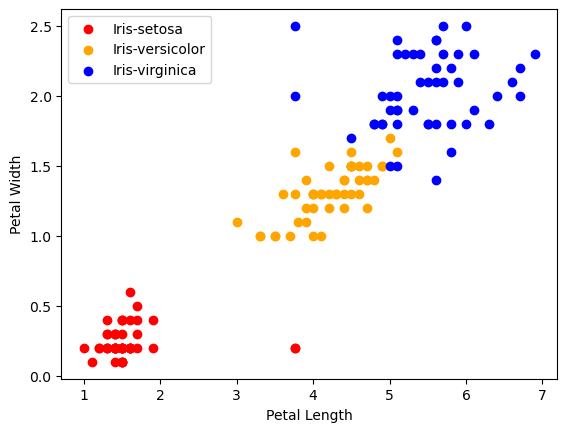

In [26]:
for i in range(3):
    x=data1[data1['Classification']==Classification[i]]
    plt.scatter(x['PL'],x['PW'],c=colors[i],label=Classification[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

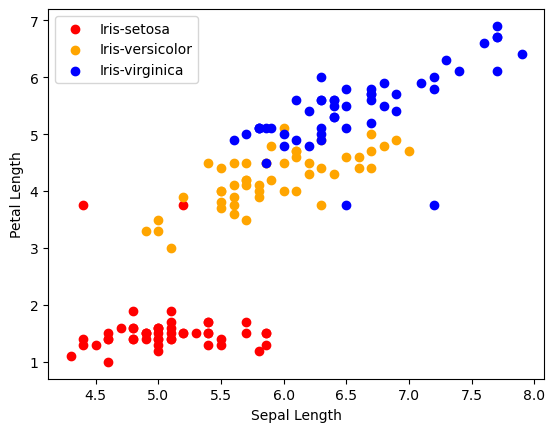

In [27]:
for i in range(3):
    x=data1[data1['Classification']==Classification[i]]
    plt.scatter(x['SL'],x['PL'],c=colors[i],label=Classification[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

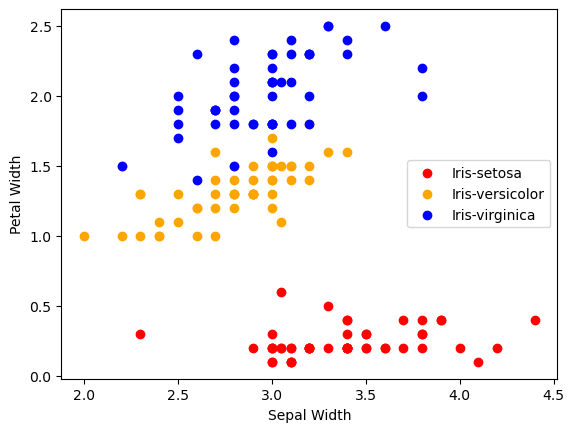

In [28]:
for i in range(3):
    x=data1[data1['Classification']==Classification[i]]
    plt.scatter(x['SW'],x['PW'],c=colors[i],label=Classification[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

# Coorelation Matrix


In [29]:
data1.corr()

,SL,SW,PL,PW
SL,1.000000,-0.099250,0.831400,0.800726
SW,-0.099250,1.000000,-0.413551,-0.340278
PL,0.831400,-0.413551,1.000000,0.936389
PW,0.800726,-0.340278,0.936389,1.000000


<AxesSubplot:>

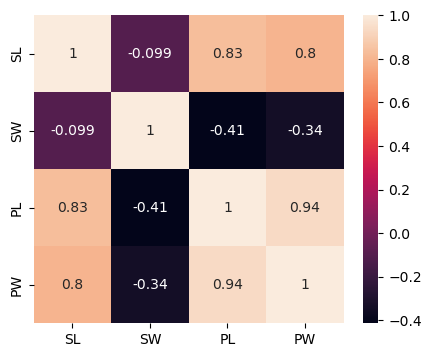

In [30]:
corr=data1.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True, ax=ax)

# Label Encoder

In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data1['Classification']= label_encoder.fit_transform(data1['Classification'])  
data1.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


In [32]:
data1['Classification'].unique()

array([0, 1, 2])

# Model Training

In [60]:
from sklearn.model_selection import train_test_split
#train=70
#test=30
y=data1['Classification']
X=data1.drop(['Classification'],axis=1)

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42)

In [61]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()


In [62]:
model.fit(x_train,y_train)

C:\Users\manju\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
y_pred=model.predict(x_test)

In [64]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [65]:
#print metric to get performance
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 97.77777777777777


# KNN K nearest neighbours

In [66]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [67]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 95.55555555555556


C:\Users\manju\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [69]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 100.0


## Decision tree gives the best result. because its accuracy rate is 100%